In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, \
                MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).\
                                    astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).\
                                    astype('float32') / 255

In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [4]:
# Encoding 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', \
                    input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', \
                      padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, \
                      padding='same', activation='relu'))

# Decoding 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', \
                      activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', \
                      activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', \
                      activation='sigmoid'))

In [5]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

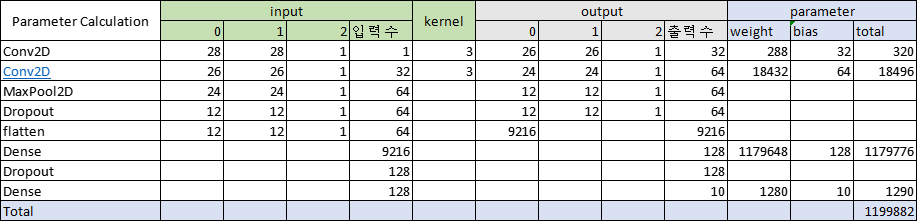

In [7]:
# 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, \
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 39s 79ms/step - loss: 0.2124 - val_loss: 0.1394
Epoch 2/50
469/469 [==============================] - 35s 75ms/step - loss: 0.1279 - val_loss: 0.1184
Epoch 3/50
469/469 [==============================] - 37s 78ms/step - loss: 0.1152 - val_loss: 0.1101
Epoch 4/50
469/469 [==============================] - 36s 76ms/step - loss: 0.1087 - val_loss: 0.1051
Epoch 5/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1044 - val_loss: 0.1017
Epoch 6/50
469/469 [==============================] - 36s 77ms/step - loss: 0.1013 - val_loss: 0.0993
Epoch 7/50
469/469 [==============================] - 36s 76ms/step - loss: 0.0992 - val_loss: 0.0973
Epoch 8/50
469/469 [==============================] - 35s 75ms/step - loss: 0.0975 - val_loss: 0.0955
Epoch 9/50
469/469 [==============================] - 35s 74ms/step - loss: 0.0962 - val_loss: 0.0943
Epoch 10/50
469/469 [==============================] - 35s 75ms/step - loss: 0.095

In [11]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)  

In [12]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)  # 앞서 만든 오토인코더 모델에 넣기

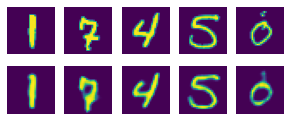

In [13]:
plt.figure(figsize=(7, 2))  # 출력 이미지 크기 정하기
 
for i, image_idx in enumerate(random_test):    
   # 랜덤으로 뽑은 이미지를 차례로 나열
   ax = plt.subplot(2, 7, i + 1)
   # 테스트할 이미지를 먼저 그대로 보여줌
   plt.imshow(X_test[image_idx].reshape(28, 28))  
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   # 오토인코딩 결과를 다음 열에 입력
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  
   ax.axis('off')
plt.show()